<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---



---

# **Projeto Parceria Ebac - Analise de Dados Desempenho Acadêmico**

## **Objetivo do Projeto**

O objetivo deste projeto é desenvolver um modelo preditivo para analisar e prever o desempenho acadêmico de alunos, utilizando técnicas de machine learning e análise de dados.

Com base em dados coletados sobre fatores que influenciam o rendimento escolar como: horas de estudo, frequência, apoio familiar e motivação, buscamos identificar e quantificar a influência desses fatores na nota final dos alunos.

A previsão de desempenho acadêmico pode fornecer insights importantes para instituições de ensino e responsáveis, permitindo intervenções direcionadas para melhorar o desenvolvimento dos alunos, como um todo, com o objetivo de auxiliar na tomada de decisões pedagógicas e no desenvolvimento de políticas educacionais mais eficazes.

## **Dados Utilizados e Metodologia**

Os dados utilizados neste projeto foram obtidos na plataforma Kaggle, em um dataset intitulado: **Student Performance Factors**. [Link Dataset](https://www.kaggle.com/datasets/whenamancodes/student-performance)

Esse conjunto de dados contém informações sobre o desempenho acadêmico de estudantes do ensino secundário de duas escolas portuguesas e inclui variáveis que representam fatores internos e externos que podem impactar as notas.

O dataset inclui as seguintes variáveis:

**Variáveis numéricas:** Horas de estudo, frequência às aulas, horas de sono,
notas anteriores, sessões de tutoria e atividade física.

**Variáveis categóricas:** Envolvimento dos pais, acesso a recursos, participação em atividades extracurriculares, nível de motivação, renda familiar, qualidade do ensino, influência dos colegas, presença de dificuldades de aprendizado e nível de escolaridade dos pais.

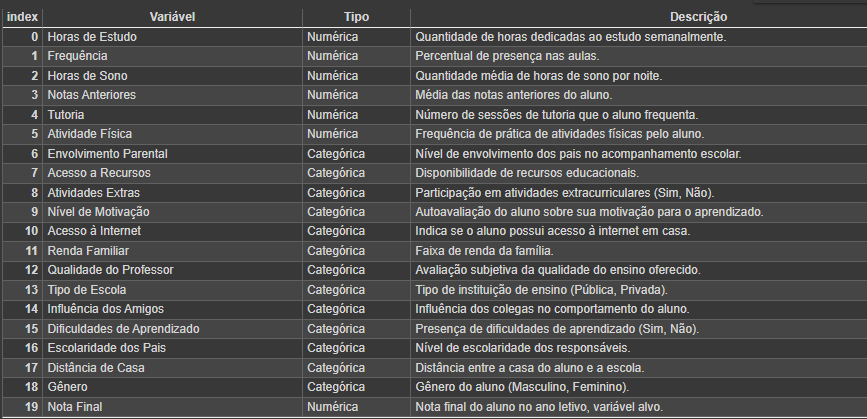


## **Processo de Análise: Coleta e Preparação de Dados**

O processo de coleta de dados foi realizado utilizando um conjunto de dados público do Kaggle, que fornece informações sobre fatores internos e externos que podem influenciar o desempenho acadêmico dos alunos. Após a coleta, passamos ao pré-processamento, essencial para garantir a qualidade dos dados antes da aplicação dos modelos de machine learning.

* Tratamento de Valores Nulos: Tratamos valores nulos preenchendo-os com base na mediana, moda ou uma categoria Indefinido, dependendo do tipo da variável.

*   Codificação de Variáveis Categóricas: Codificamos as variáveis categóricas usando técnicas de One-Hot Encoding, transformando-as em
um formato numérico que o modelo de machine learning pode interpretar.

## **Análise Exploratória: (EDA)**

Foi realizada uma análise exploratória para compreender a distribuição e a relação das variáveis com a nota final. A análise também verificou a presença de padrões e possíveis outliers nos dados.

## **Seleção e Construção do Modelo de Machine Learning:**

Foram testados modelos de regressão, como o Random Forest e o Gradient Boosting, com o objetivo de prever a nota final dos alunos.

O ajuste dos hiperparâmetros foi realizado por meio de Grid Search, buscando maximizar a precisão dos modelos.

O modelo Gradient Boosting foi selecionado como o final, por apresentar o menor Erro Quadrático Médio (MSE) e o maior coeficiente de determinação (R²), indicando uma capacidade preditiva superior.

## **Conclusão Final:**

Este projeto demonstrou a aplicação prática de análise de dados e machine learning para prever o desempenho acadêmico de alunos com base em fatores internos e externos. Utilizando um conjunto de dados sobre desempenho escolar, identificamos que variáveis como frequência às aulas, horas de estudo e notas anteriores têm um impacto significativo na nota final dos alunos. No entanto, a distribuição das notas mostrou-se concentrada em um intervalo relativamente estreito, entre 65 e 75 pontos, com pouca variação extrema.

Pode-se observar também, que as variáveis com maior importância no modelo, incluindo frequência, horas de estudo e motivação, acesso a internt, tipo de escola, apresentaram distribuições consistentes e homogêneas, o que sugere que a maioria dos alunos possui estímulos e condições de estudo semelhantes. Não foi observada nenhuma variável isolada com impacto altamente diferenciado, nem de forma positiva nem negativa, o que indica que o desempenho tende a ser influenciado por um conjunto equilibrado de fatores.

O modelo de Gradient Boosting foi selecionado como o melhor preditor, apresentando bons resultados ao explicar aproximadamente 75% da variação nas notas. Essa previsão pode auxiliar educadores e responsáveis a identificar e monitorar fatores críticos que afetam o rendimento escolar, possibilitando intervenções mais direcionadas para melhorar o rendimento escolar e pessoal do aluno.

No geral, este projeto exemplifica como a análise de dados e o aprendizado de máquina podem fornecer insights significativos para o setor educacional, contribuindo para políticas e estratégias pedagógicas mais eficazes e alinhadas às necessidades dos alunos.

## 1. Importação e Carregamento de Dados

In [ ]:
# Upload e manipulação de dados
from google.colab import files
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem e Avaliação
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Pré-processamento e Transformações
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

df.head()

Saving StudentPerformanceFactorsZip.zip to StudentPerformanceFactorsZip.zip


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## 2. Limpeza de Dados e Pré-processamento

In [ ]:
# Renomear as colunas para faciliatar leitura dos dados
colunas_renomeadas = {
    'Hours_Studied': 'Horas_Estudo',
    'Attendance': 'Frequencia',
    'Parental_Involvement': 'Envolvimento_Parental',
    'Access_to_Resources': 'Acesso_Recursos',
    'Extracurricular_Activities': 'Atividades_Extras',
    'Sleep_Hours': 'Horas_Sono',
    'Previous_Scores': 'Notas_Anteriores',
    'Motivation_Level': 'Nivel_Motivacao',
    'Internet_Access': 'Acesso_Internet',
    'Tutoring_Sessions': 'Tutoria',
    'Family_Income': 'Renda_Familiar',
    'Teacher_Quality': 'Qualidade_Professor',
    'School_Type': 'Tipo_Escola',
    'Peer_Influence': 'Influencia_Amigos',
    'Physical_Activity': 'Atividades_Fisica',
    'Learning_Disabilities': 'Dificuldades_Aprendizado',
    'Parental_Education_Level': 'Escolaridade_Parental',
    'Distance_from_Home': 'Distancia_Casa',
    'Gender': 'Genero',
    'Exam_Score': 'Nota_Final'
}

df.rename(columns=colunas_renomeadas, inplace=True)
print(df.head())

   Horas_Estudo  Frequencia Envolvimento_Parental Acesso_Recursos  \
0            23          84                   Low            High   
1            19          64                   Low          Medium   
2            24          98                Medium          Medium   
3            29          89                   Low          Medium   
4            19          92                Medium          Medium   

  Atividades_Extras  Horas_Sono  Notas_Anteriores Nivel_Motivacao  \
0                No           7                73             Low   
1                No           8                59             Low   
2               Yes           7                91          Medium   
3               Yes           8                98          Medium   
4               Yes           6                65          Medium   

  Acesso_Internet  Tutoria Renda_Familiar Qualidade_Professor Tipo_Escola  \
0             Yes        0            Low              Medium      Public   
1             Ye

In [ ]:
df.isnull().sum()

,0
Horas_Estudo,0
Frequencia,0
Envolvimento_Parental,0
Acesso_Recursos,0
Atividades_Extras,0
Horas_Sono,0
Notas_Anteriores,0
Nivel_Motivacao,0
Acesso_Internet,0
Tutoria,0


In [ ]:
# Verificar o tipo de dado e os valores únicos da coluna 'Distancia_Casa'
print(df['Distancia_Casa'].dtype)
print(df['Distancia_Casa'].unique())

object
['Near' 'Moderate' 'Far' nan]


In [ ]:
# Tratando os nulos
# Preencher Qualidade_Professor e Escolaridade_Parental com "Indefinido"
df.loc[:, 'Qualidade_Professor'] = df['Qualidade_Professor'].fillna('Indefinido')
df.loc[:, 'Escolaridade_Parental'] = df['Escolaridade_Parental'].fillna('Indefinido')

# Preencher Distancia_Casa com a categoria mais frequente (moda)
df.loc[:, 'Distancia_Casa'] = df['Distancia_Casa'].fillna(df['Distancia_Casa'].mode()[0])

print(df.isnull().sum())

Horas_Estudo                0
Frequencia                  0
Envolvimento_Parental       0
Acesso_Recursos             0
Atividades_Extras           0
Horas_Sono                  0
Notas_Anteriores            0
Nivel_Motivacao             0
Acesso_Internet             0
Tutoria                     0
Renda_Familiar              0
Qualidade_Professor         0
Tipo_Escola                 0
Influencia_Amigos           0
Atividades_Fisica           0
Dificuldades_Aprendizado    0
Escolaridade_Parental       0
Distancia_Casa              0
Genero                      0
Nota_Final                  0
dtype: int64


In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Colunas Numéricas:", numerical_columns)
print("\n")
print("Colunas Categóricas:", categorical_columns)

Colunas Numéricas: ['Horas_Estudo', 'Frequencia', 'Horas_Sono', 'Notas_Anteriores', 'Tutoria', 'Atividades_Fisica', 'Nota_Final']


Colunas Categóricas: ['Envolvimento_Parental', 'Acesso_Recursos', 'Atividades_Extras', 'Nivel_Motivacao', 'Acesso_Internet', 'Renda_Familiar', 'Qualidade_Professor', 'Tipo_Escola', 'Influencia_Amigos', 'Dificuldades_Aprendizado', 'Escolaridade_Parental', 'Distancia_Casa', 'Genero']


## 3. Transformação dos Dados

In [ ]:
#Verificando a distribuição da variáveis categóricas
categorical_columns = ['Envolvimento_Parental', 'Acesso_Recursos',
                       'Atividades_Extras', 'Nivel_Motivacao', 'Acesso_Internet',
                       'Renda_Familiar', 'Tipo_Escola', 'Influencia_Amigos',
                       'Dificuldades_Aprendizado', 'Genero']

for col in categorical_columns:
    print(f"Análise da variável categórica: {col}")
    print("\nContagem de cada categoria:")
    print(df[col].value_counts())
    print("\n" + "-"*80 + "\n")

Análise da variável categórica: Envolvimento_Parental

Contagem de cada categoria:
Envolvimento_Parental
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

--------------------------------------------------------------------------------

Análise da variável categórica: Acesso_Recursos

Contagem de cada categoria:
Acesso_Recursos
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

--------------------------------------------------------------------------------

Análise da variável categórica: Atividades_Extras

Contagem de cada categoria:
Atividades_Extras
Yes    3938
No     2669
Name: count, dtype: int64

--------------------------------------------------------------------------------

Análise da variável categórica: Nivel_Motivacao

Contagem de cada categoria:
Nivel_Motivacao
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

--------------------------------------------------------------------------------

Análise da variáv

In [ ]:
# Verificando a distribuição das variáveis numéricas
numerical_columns = ['Horas_Estudo', 'Frequencia', 'Horas_Sono', 'Notas_Anteriores',
                     'Tutoria', 'Atividades_Fisica', 'Nota_Final']

for col in numerical_columns:
    print("\nDistribuição de valores:")
    print(df[col].value_counts().head(10))
    print("\n" + "-"*80 + "\n")


Distribuição de valores:
Horas_Estudo
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
Name: count, dtype: int64

--------------------------------------------------------------------------------


Distribuição de valores:
Frequencia
67    190
98    187
76    185
77    184
64    182
94    180
84    175
79    175
91    175
82    173
Name: count, dtype: int64

--------------------------------------------------------------------------------


Distribuição de valores:
Horas_Sono
7     1741
8     1399
6     1376
9      775
5      695
10     312
4      309
Name: count, dtype: int64

--------------------------------------------------------------------------------


Distribuição de valores:
Notas_Anteriores
66    165
94    155
96    153
85    150
71    146
53    144
59    142
82    141
76    140
88    139
Name: count, dtype: int64

--------------------------------------------------------------------------------


Distribuição de valores:
Tutor

## 4. Análise Exploratória

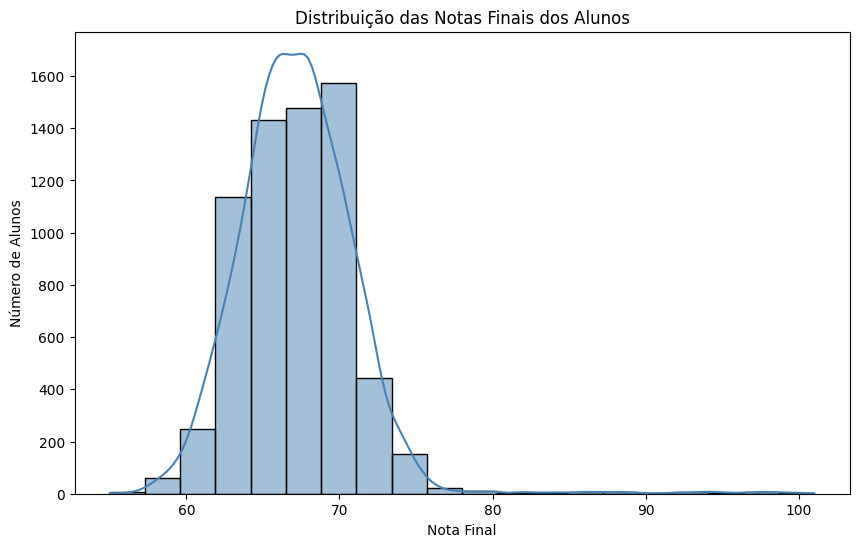

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nota_Final'], bins=20, kde=True, color='#4682B4')
plt.title('Distribuição das Notas Finais dos Alunos')
plt.xlabel('Nota Final')
plt.ylabel('Número de Alunos')
plt.show()

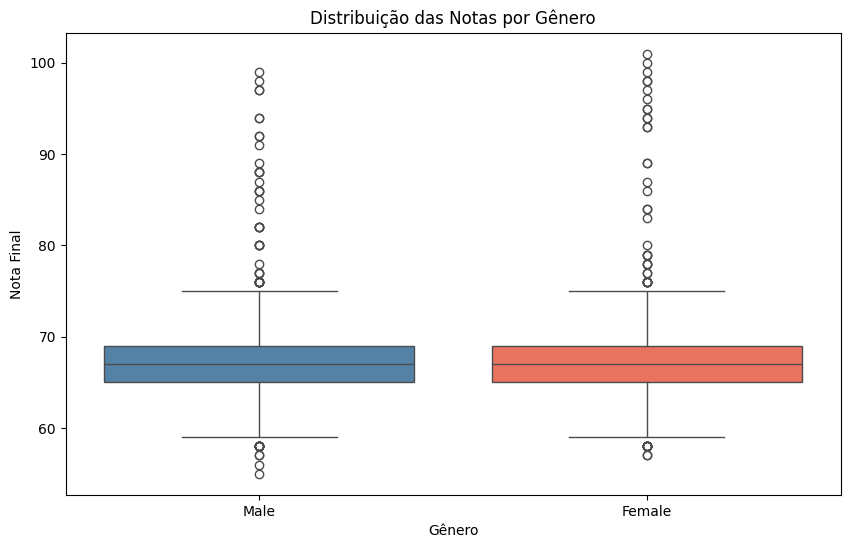

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Nota_Final', data=df, hue='Genero', palette=['#4682B4', '#FF6347'], dodge=False)
plt.title('Distribuição das Notas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota Final')
plt.show()

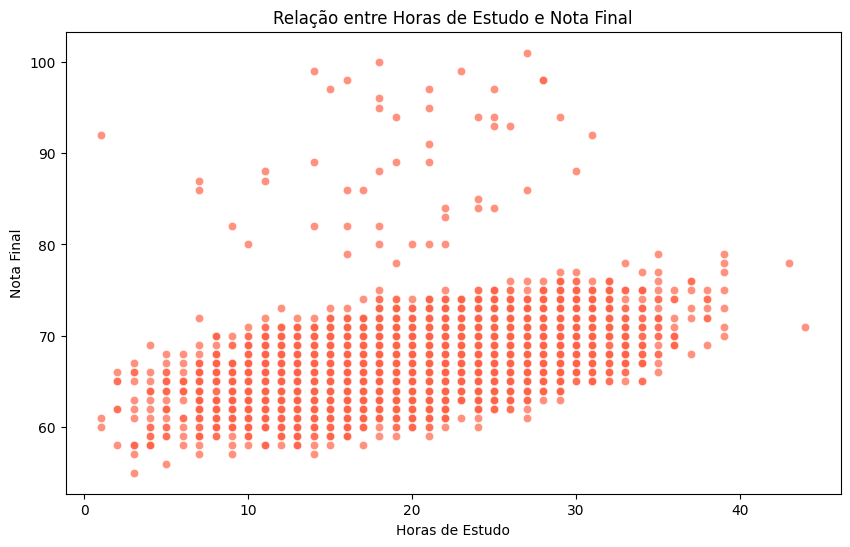

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horas_Estudo', y='Nota_Final', data=df, color='#FF6347', alpha=0.7)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota Final')
plt.show()

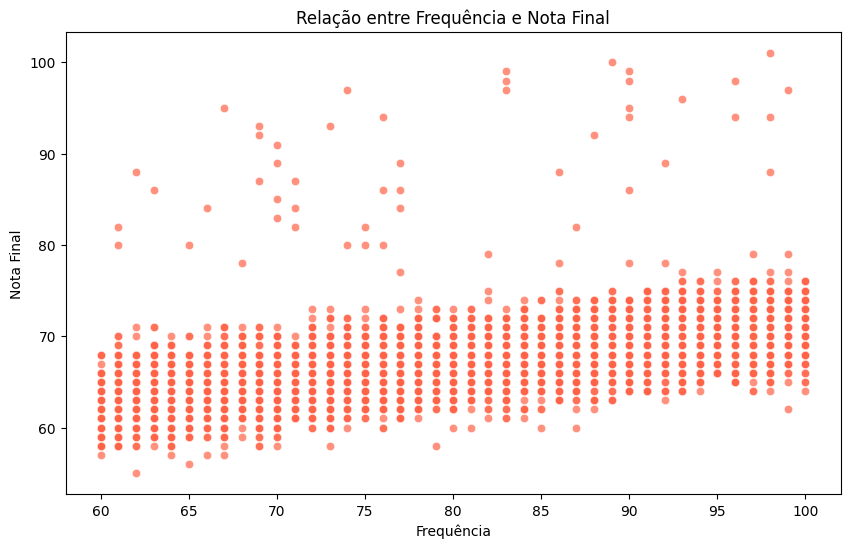

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequencia', y='Nota_Final', data=df, color='#FF6347', alpha=0.7)
plt.title('Relação entre Frequência e Nota Final')
plt.xlabel('Frequência')
plt.ylabel('Nota Final')
plt.show()

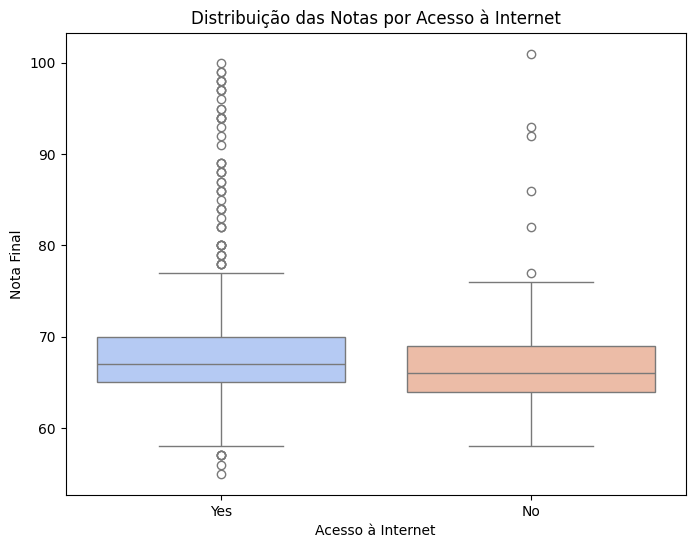

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Acesso_Internet', y='Nota_Final', data=df, hue='Acesso_Internet', palette='coolwarm', dodge=False)
plt.title('Distribuição das Notas por Acesso à Internet')
plt.xlabel('Acesso à Internet')
plt.ylabel('Nota Final')
plt.show()

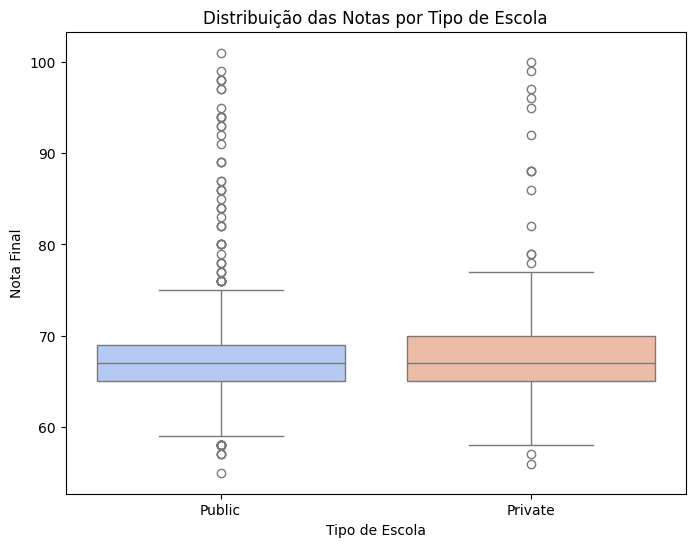

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tipo_Escola', y='Nota_Final', data=df, hue='Tipo_Escola', palette='coolwarm', dodge=False)
plt.title('Distribuição das Notas por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota Final')
plt.show()

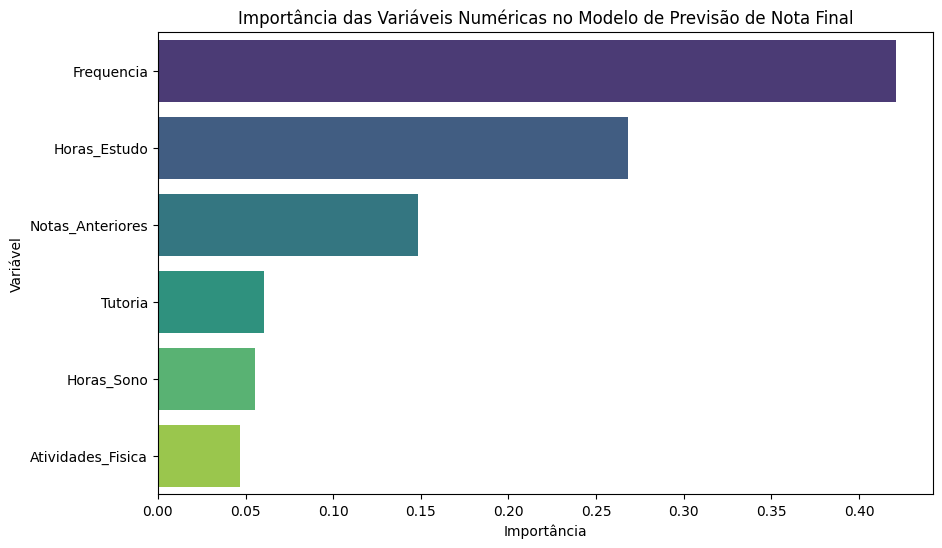

In [ ]:
# Importancia das variáveis numericas
numerical_columns = ['Horas_Estudo', 'Frequencia', 'Horas_Sono', 'Notas_Anteriores',
                     'Tutoria', 'Atividades_Fisica']
X = df[numerical_columns]
y = df['Nota_Final']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obter a importância das variáveis
importances = model.feature_importances_
feature_names = X.columns

# Criar um DataFrame com as importâncias
importance_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Visualizar as importâncias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=importance_df, hue='Variável', dodge=False, legend=False, palette='viridis')
plt.title('Importância das Variáveis Numéricas no Modelo de Previsão de Nota Final')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

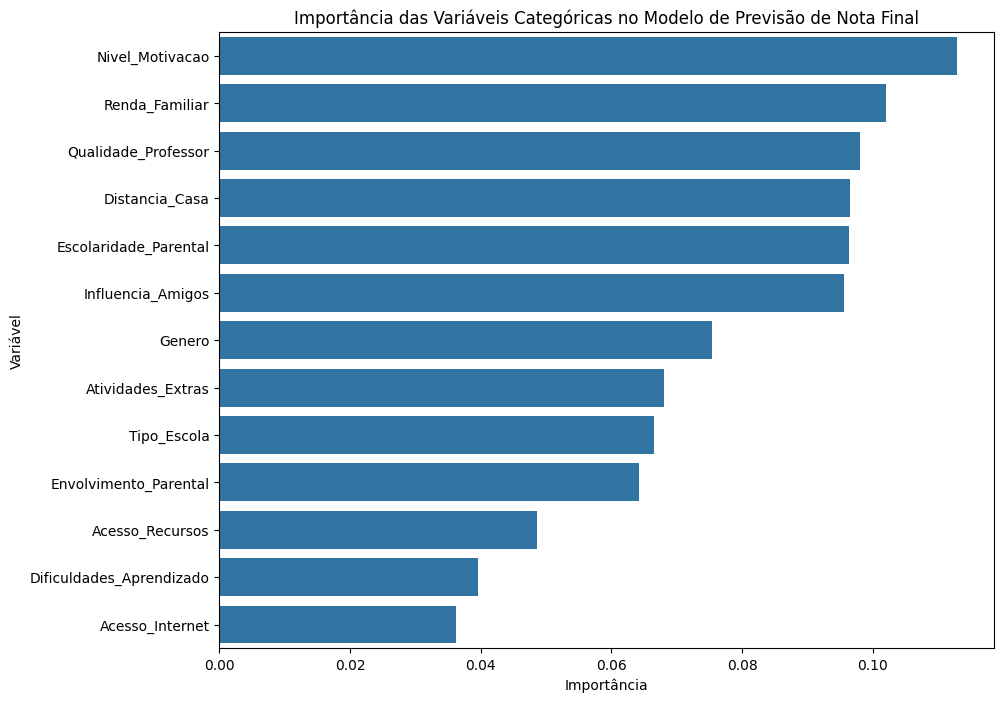

In [ ]:
# Importancia das variáveis categóricas
categorical_columns = ['Envolvimento_Parental', 'Acesso_Recursos', 'Atividades_Extras',
                       'Nivel_Motivacao', 'Acesso_Internet', 'Renda_Familiar',
                       'Qualidade_Professor', 'Tipo_Escola', 'Influencia_Amigos',
                       'Dificuldades_Aprendizado', 'Escolaridade_Parental', 'Distancia_Casa', 'Genero']

# Codificar variáveis categóricas com LabelEncoder para cada coluna separadamente
df_encoded = df.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Definir as variáveis independentes (apenas as categóricas codificadas) e a variável dependente
X_cat = df_encoded[categorical_columns]
y = df_encoded['Nota_Final']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

# Treinar o modelo de Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obter a importância das variáveis
importances = model.feature_importances_
feature_names = X_cat.columns

# Criar DataFrame para as importâncias
importance_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Visualizar as importâncias
plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Variável', data=importance_df)
plt.title('Importância das Variáveis Categóricas no Modelo de Previsão de Nota Final')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

## **5. Treinamento do Modelo de Machine Learning**

In [ ]:
# Definir variáveis dependentes e independentes
X = df.drop(columns=['Nota_Final'])
y = df['Nota_Final']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar o pré-processador para codificar as variáveis categóricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'
)

# Criar pipeline com Random Forest
pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar o modelo Random Forest
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Avaliar o modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

Random Forest - MSE: 5.01
Random Forest - R²: 0.65


In [ ]:
# Criar pipeline com Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocess', preprocessor),
    ('gb', GradientBoostingRegressor(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42))
])

# Treinar o modelo Gradient Boosting
pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)

# Avaliar o modelo Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}")
print(f"Gradient Boosting - R²: {r2_gb:.2f}")

Gradient Boosting - MSE: 3.88
Gradient Boosting - R²: 0.73


In [ ]:
# Definir o espaço de busca para os hiperparâmetros
param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__max_depth': [3, 4, 5],
    'gb__learning_rate': [0.05, 0.1, 0.2]
}

# Configurar o Grid Search com o pipeline atual
grid_search = GridSearchCV(pipeline_gb, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)

# Treinar o Grid Search
grid_search.fit(X_train, y_train)

# Avaliar o melhor modelo encontrado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Melhores Hiperparâmetros:", grid_search.best_params_)
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Melhores Hiperparâmetros: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 200}
MSE (Erro Quadrático Médio): 3.59
R² (Coeficiente de Determinação): 0.75


## **6. Predições com Aluno Fictício**

In [ ]:
novos_dados = pd.DataFrame({
    'Frequencia': [85, 90, 75],
    'Horas_Estudo': [20, 15, 18],
    'Notas_Anteriores': [80, 70, 65],
    'Tutoria': [2, 1, 3],
    'Atividades_Fisica': [3, 2, 4],
    'Horas_Sono': [7, 6, 8],
    'Dificuldades_Aprendizado': ['No', 'Yes', 'No'],
    'Escolaridade_Parental': ['High School', 'College', 'Postgraduate'],
    'Atividades_Extras': ['Yes', 'No', 'Yes'],
    'Influencia_Amigos': ['Positive', 'Neutral', 'Negative'],
    'Genero': ['Male', 'Female', 'Male'],
    'Distancia_Casa': ['Near', 'Moderate', 'Far'],
    'Acesso_Recursos': ['High', 'Medium', 'Low'],
    'Qualidade_Professor': ['High', 'Medium', 'Low'],
    'Renda_Familiar': ['Medium', 'High', 'Low'],
    'Envolvimento_Parental': ['High', 'Medium', 'Low'],
    'Nivel_Motivacao': ['High', 'Medium', 'Low'],
    'Acesso_Internet': ['Yes', 'No', 'Yes'],
    'Tipo_Escola': ['Public', 'Private', 'Public'],
})

# Fazer previsões com o modelo otimizado
predicoes = grid_search.best_estimator_.predict(novos_dados)

# Exibir as previsões
for i, predicao in enumerate(predicoes):
    print(f"Previsão para o aluno {i+1}: Nota Final = {predicao:.2f}")

Previsão para o aluno 1: Nota Final = 71.54
Previsão para o aluno 2: Nota Final = 65.20
Previsão para o aluno 3: Nota Final = 62.29


In [ ]:
novos_alunos = pd.DataFrame({
    'Frequencia': [88, 72, 95],
    'Horas_Estudo': [17, 25, 10],
    'Notas_Anteriores': [78, 82, 90],
    'Tutoria': [1, 3, 2],
    'Atividades_Fisica': [2, 5, 3],
    'Envolvimento_Parental': ['Medium', 'High', 'Low'],
    'Nivel_Motivacao': ['Medium', 'Low', 'High'],
    'Acesso_Recursos': ['High', 'Medium', 'Low'],
    'Atividades_Extras': ['Yes', 'No', 'Yes'],
    'Horas_Sono': [7, 6, 8],
    'Dificuldades_Aprendizado': ['No', 'Yes', 'No'],
    'Renda_Familiar': ['Medium', 'High', 'Low'],
    'Escolaridade_Parental': ['College', 'High School', 'Postgraduate'],
    'Qualidade_Professor': ['Medium', 'High', 'Low'],
    'Distancia_Casa': ['Near', 'Far', 'Moderate'],
    'Genero': ['Male', 'Female', 'Male'],
    'Influencia_Amigos': ['Neutral', 'Positive', 'Negative'],
    'Tipo_Escola': ['Public', 'Private', 'Public'],
    'Acesso_Internet': ['Yes', 'No', 'Yes']
})

# Fazer previsões usando o modelo treinado com melhores hiperparâmetros
predicoes_novos = grid_search.best_estimator_.predict(novos_alunos)

# Exibir as previsões
for i, predicao in enumerate(predicoes_novos, start=1):
    print(f"Previsão para o aluno {i}: Nota Final = {predicao:.2f}")

Previsão para o aluno 1: Nota Final = 69.28
Previsão para o aluno 2: Nota Final = 67.20
Previsão para o aluno 3: Nota Final = 65.87
